In [1]:
import pandas as pd
import os
import json

In [1]:
def load_and_combine_json_files(input_folder):
    """Loads and combines JSON data from files in the input folder."""
    all_data = []
    for file_name in os.listdir(input_folder):
        if file_name.startswith('gh_actions') and file_name.endswith('.json'):
            with open(os.path.join(input_folder, file_name)) as file:
                all_data.extend(json.load(file))
    return all_data

def flatten_and_filter_data(data, exclude_orgs):
    """Converts the list of records to a DataFrame, flattens nested fields, and filters out excluded organisations."""
    # Convert to DataFrame and flatten the nested JSON fields
    df = pd.json_normalize(data)
    
    # Filter out rows with excluded organisations
    if 'repository.organisation' in df.columns:
        df = df[~df['repository.organisation'].isin(exclude_orgs)]

    return df.reset_index(drop=True)

In [2]:
# Parameters
input_folder = '../data/datasets/actions'
exclude_orgs = ['conda-forge', 'openjournals', 'Bioconductor']

# Load and combine JSON data
data = load_and_combine_json_files(input_folder)
    
# Flatten and filter data
df = flatten_and_filter_data(data, exclude_orgs)
    
# Show unique counts
unique_actors = df['actor.id'].nunique()
unique_repositories = df['repository.id'].nunique()
unique_organisations = df['repository.organisation_id'].nunique()
    
print(f"Unique actors: {unique_actors}")
print(f"Unique repositories: {unique_repositories}")
print(f"Unique organisations: {unique_organisations}")

Unique actors: 111775
Unique repositories: 2440
Unique organisations: 58


In [5]:
df.sort_values(by=['date']).head(10)

,action,event_id,date,actor.id,actor.login,repository.id,repository.name,repository.organisation,repository.organisation_id,details.push.id,...,details.release.author.id,details.release.author.login,details.release.draft,details.release.prerelease,details.release.created_date,details.repository.main_branch,details.repository.description,details.pages,details.member.id,details.member.login
824710,CreateIssueComment,26163436760,2023-01-01T00:02:48Z,365293,ccordoba12,30892477,spyder-ide/spyder,spyder-ide,1284937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824711,PushCommits,26163438842,2023-01-01T00:03:09Z,41898282,github-actions[bot],518552866,napari/npe2api,napari,39813916,1.214724e+10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824712,CommentCommit,26163442095,2023-01-01T00:03:41Z,35613825,vercel[bot],518552866,napari/npe2api,napari,39813916,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824713,CloseIssue,26163454144,2023-01-01T00:05:40Z,15819577,mem48,153765492,ropensci/opentripplanner,ropensci,1200269,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824714,CreatePullRequestComment,26163456637,2023-01-01T00:06:07Z,41898282,github-actions[bot],858127,pandas-dev/pandas,pandas-dev,21206976,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824715,CreatePullRequestComment,26163456927,2023-01-01T00:06:10Z,41898282,github-actions[bot],858127,pandas-dev/pandas,pandas-dev,21206976,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824716,CreatePullRequestComment,26163457321,2023-01-01T00:06:15Z,41898282,github-actions[bot],858127,pandas-dev/pandas,pandas-dev,21206976,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824717,CloseIssue,26163458157,2023-01-01T00:06:24Z,15819577,mem48,153765492,ropensci/opentripplanner,ropensci,1200269,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824718,CreateIssueComment,26163458136,2023-01-01T00:06:24Z,15819577,mem48,153765492,ropensci/opentripplanner,ropensci,1200269,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
824719,CreatePullRequestComment,26163464997,2023-01-01T00:07:38Z,7458884,dmbelov,908607,numpy/numpy,numpy,288276,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import json
import os
import time

# Paths
json_file_path = '../data/datasets/actions/gh_all_actions.json'
ndjson_file_path = '../data/datasets/actions/gh_all_actions.ndjson'

# Convert JSON to NDJSON
with open(json_file_path, 'r') as json_file:
    actions = json.load(json_file)

with open(ndjson_file_path, 'w') as ndjson_file:
    for action in actions:
        ndjson_file.write(json.dumps(action) + '\n')

print("Conversion to NDJSON completed.")

# Measure import time for JSON
start_time = time.time()
with open(json_file_path, 'r') as file:
    json_actions = json.load(file)
json_load_time = time.time() - start_time
print(f"JSON load time: {json_load_time:.2f} seconds")

# Measure import time for NDJSON
start_time = time.time()
ndjson_actions = []
with open(ndjson_file_path, 'r') as file:
    for line in file:
        ndjson_actions.append(json.loads(line))
ndjson_load_time = time.time() - start_time
print(f"NDJSON load time: {ndjson_load_time:.2f} seconds")

Conversion to NDJSON completed.
JSON load time: 6.49 seconds
NDJSON load time: 28.29 seconds


In [30]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# File path to your dataset
file_path = '../data/datasets/activities/gh_all_activities.jsonl'

# Initialize lists for activity types and timestamps
activity_types = []
timestamps = []

# Read the JSONL file and extract the necessary data
with open(file_path, 'r') as f:
    for line in f:
        data = json.loads(line)
        activity_types.append(data['activity'])  # Extracting the activity type
        timestamps.append(data['start_date'])  # Extracting the start date

# Count the frequency of each activity type for the Distribution of Activity Types plot
activity_counts = Counter(activity_types)

# Sort activity types by frequency (descending order)
activity_counts = dict(sorted(activity_counts.items(), key=lambda x: x[1], reverse=True))

# Convert the timestamps to datetime format
timestamps = pd.to_datetime(timestamps)

# Create a DataFrame for temporal analysis (monthly activity counts)
df = pd.DataFrame(timestamps, columns=['timestamp'])

# Set the timestamp column as the index
df.set_index('timestamp', inplace=True)

# Resample by month-end and count the number of activities
monthly_activity = df.resample('ME').size()

# Apply Exponential Smoothing to handle missing data at the beginning
smoothed_monthly_activity = monthly_activity.ewm(span=3).mean()  # Exponential smoothing

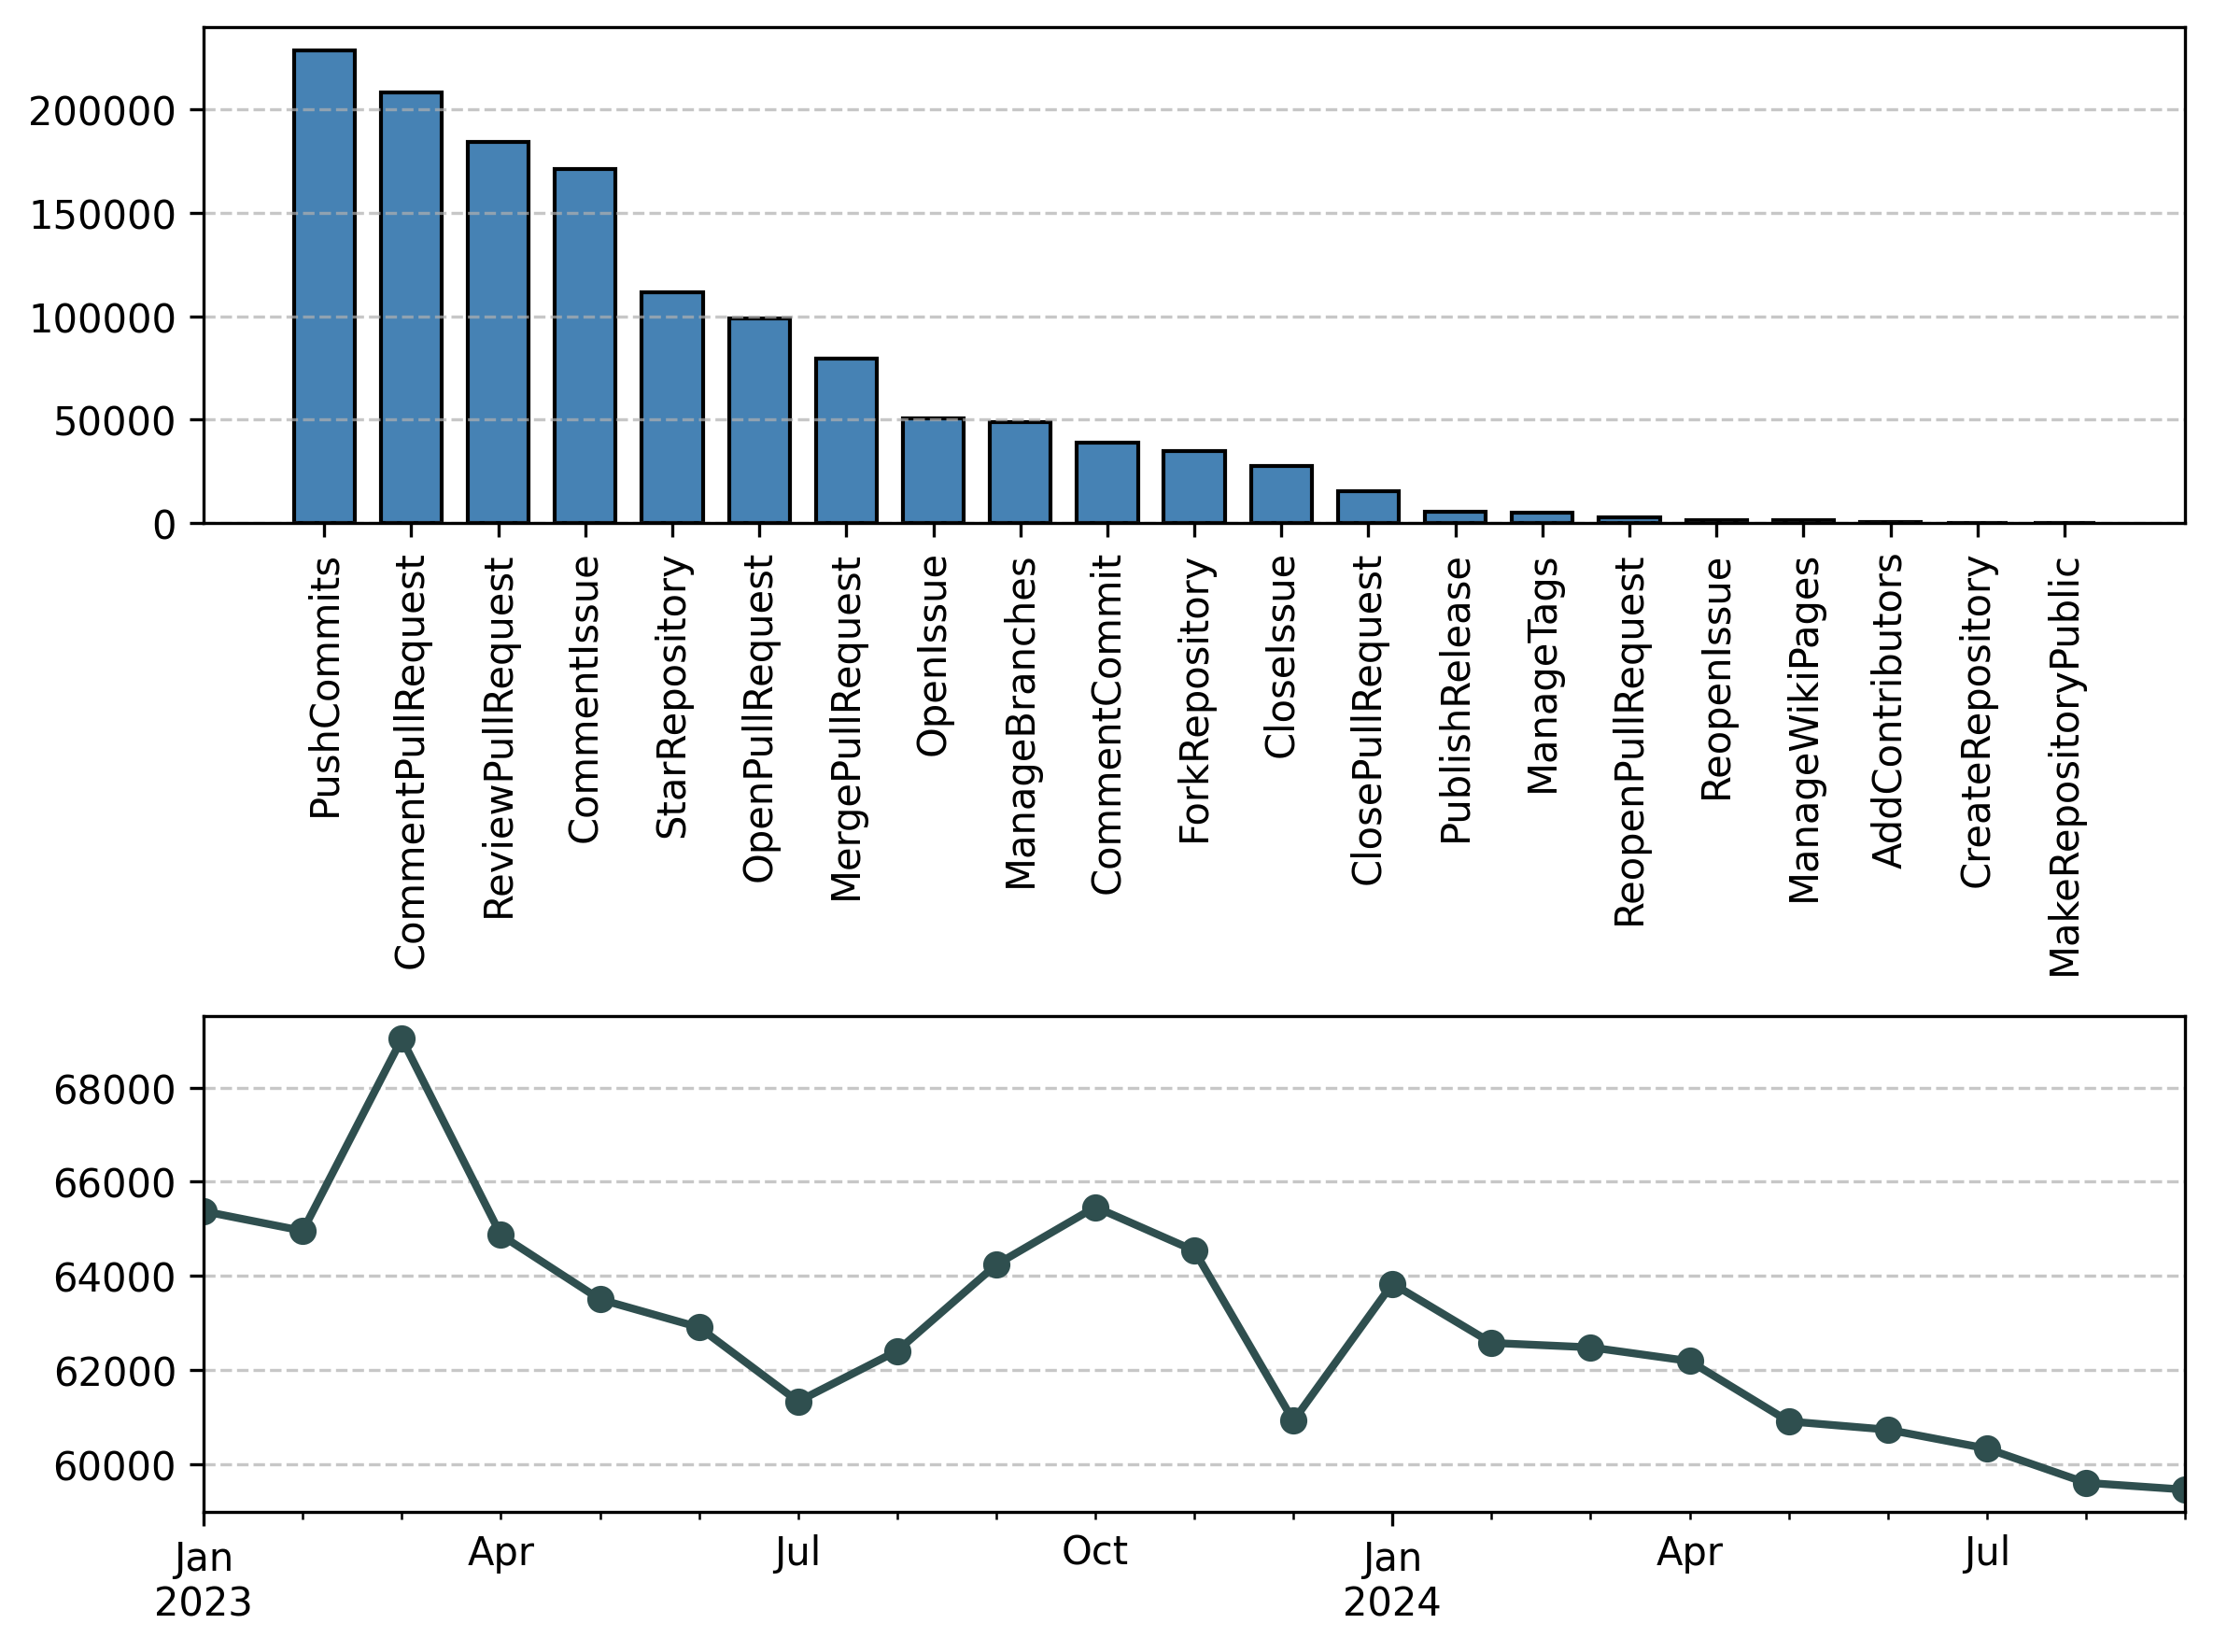

In [33]:
# Create the figure for plotting, adjusting for two-column format (8x6 size)
fig, axs = plt.subplots(2, 1, figsize=(8, 6), dpi=300, facecolor='white')

# Plot 1: Distribution of Activity Types
activity, counts = zip(*activity_counts.items())
axs[0].bar(activity, counts, color='#4682B4', edgecolor='black', width=0.7)
axs[0].tick_params(axis='x', rotation=90, labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].grid(True, axis='y', linestyle='--', alpha=0.7)

# Plot 2: Temporal Distribution of Activities (with Exponential Smoothing)
smoothed_monthly_activity.plot(kind='line', marker='o', ax=axs[1], color='darkslategray', linewidth=2, markersize=6)
axs[1].set_xlabel('')  # Remove x-label
axs[1].tick_params(axis='x', rotation=0, labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].grid(True, axis='y', linestyle='--', alpha=0.7)

# Layout adjustments for better spacing
plt.tight_layout()

# Save the figure as a high-quality image (300 dpi)
plt.savefig('../paper/activity_distribution_plots.png', dpi=300)

# Show the plot
plt.show()